In [2]:
 import os
 import tarfile
 import urllib
 DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
 HOUSING_PATH = os.path.join("datasets", "housing")
 HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
 def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
     os.makedirs(housing_path, exist_ok=True)
     tgz_path = os.path.join(housing_path, "housing.tgz")
     urllib.request.urlretrieve(housing_url, tgz_path)
     housing_tgz = tarfile.open(tgz_path)
     housing_tgz.extractall(path=housing_path)
     housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "housing.csv")
 return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


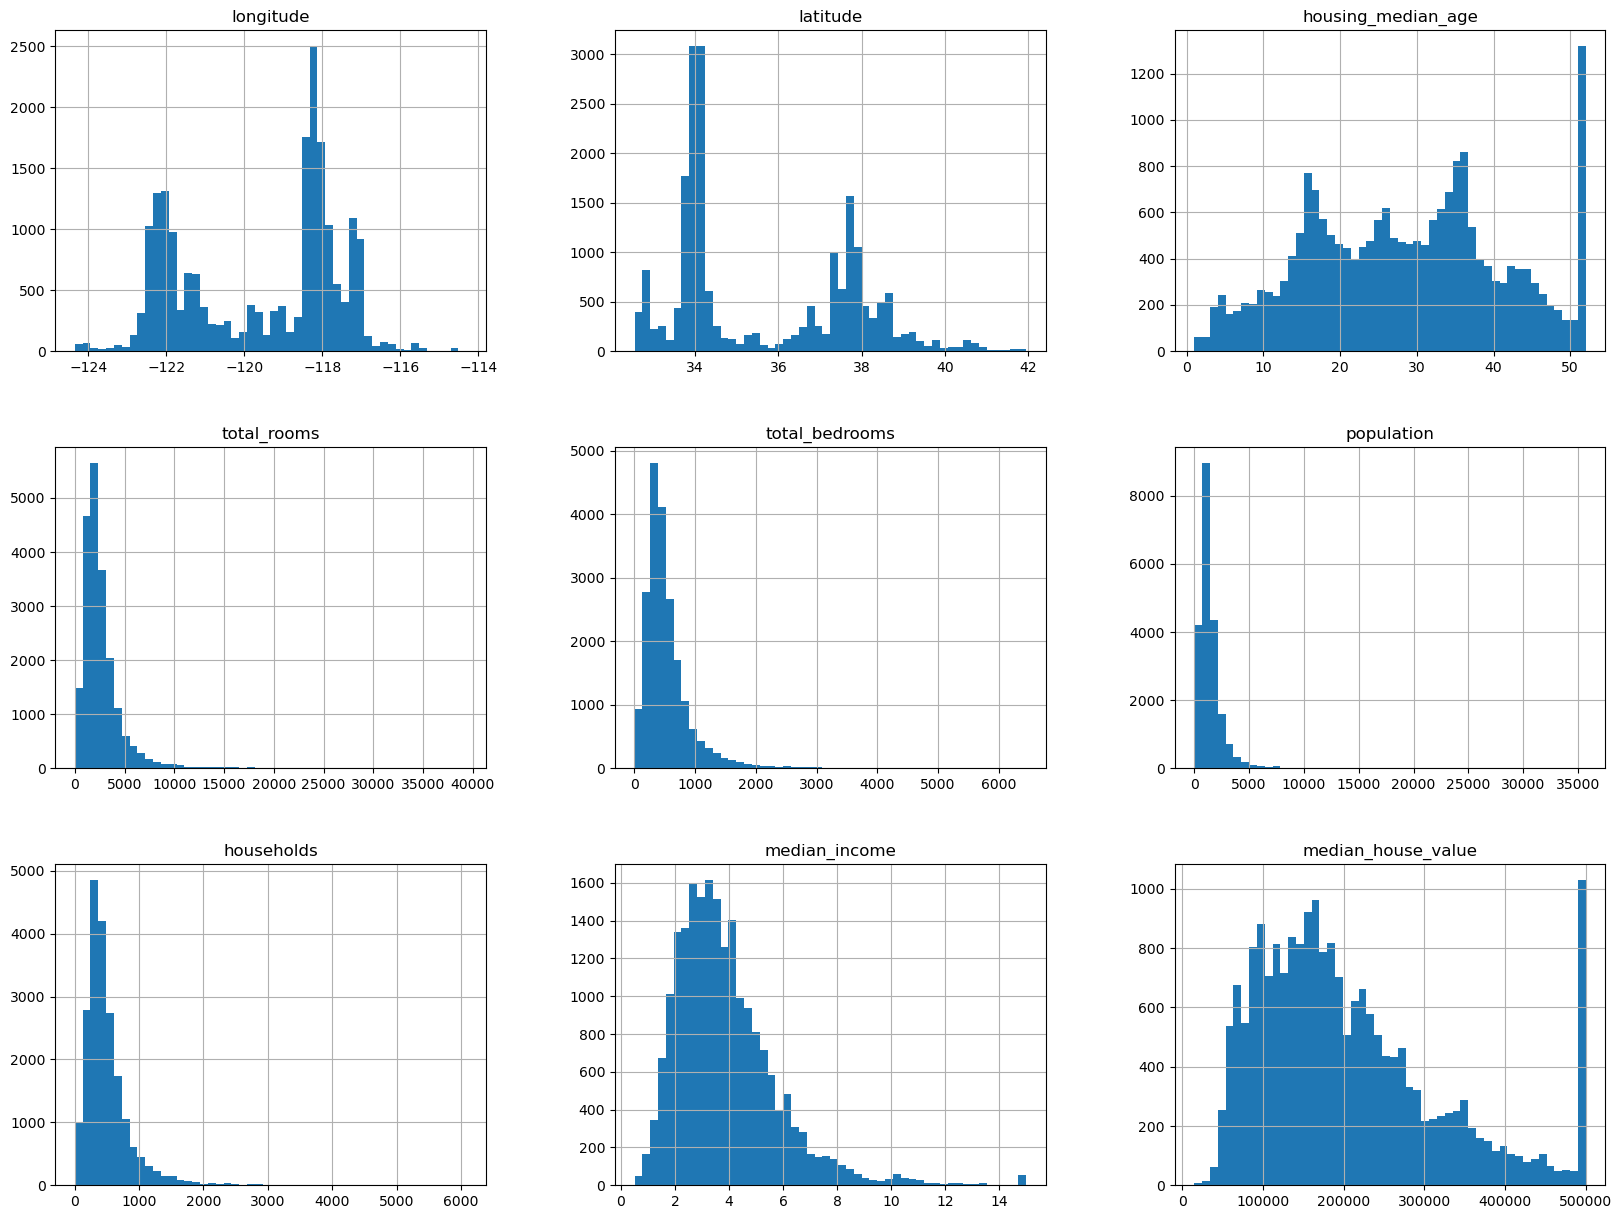

In [10]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

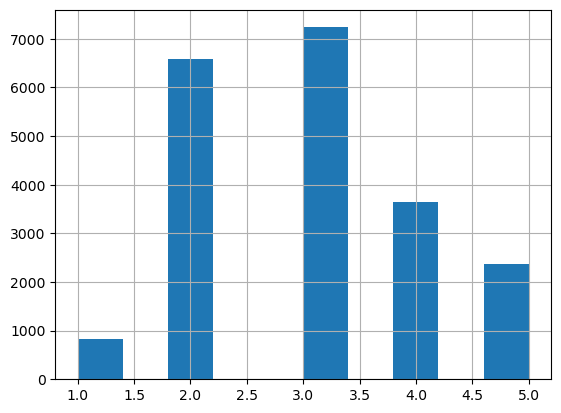

In [11]:
import numpy as np
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins = [.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                              labels = [1,2,3,4,5])
housing['income_cat'].hist()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state= 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
   strat_train_set = housing.loc[train_index]
   strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [15]:
housing = strat_train_set.copy()

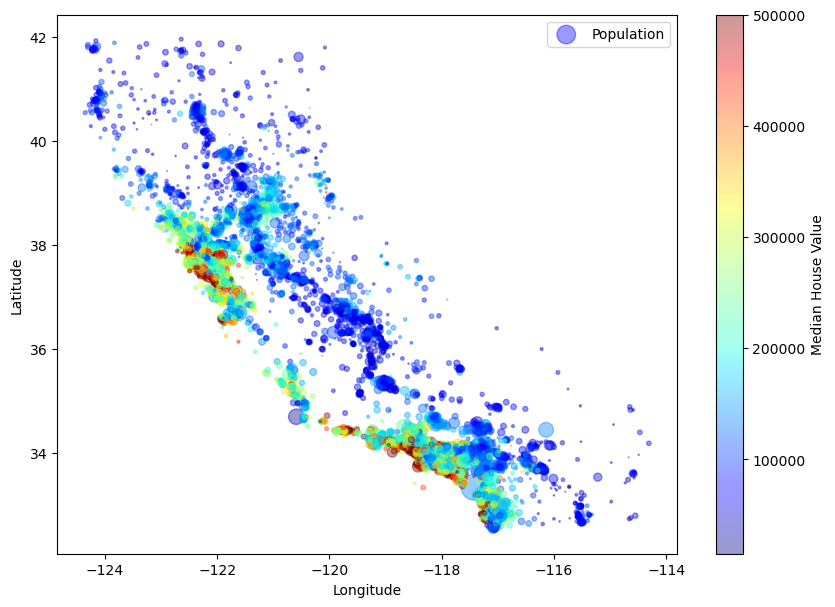

In [16]:
plt.figure(figsize=(10, 7))
plt.scatter(
    x=housing['longitude'],
    y=housing['latitude'],
    alpha=0.4,
    s=housing['population'] / 100,
    c=housing['median_house_value'],
    cmap='jet'
)
plt.colorbar(label="Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(["Population"], loc="upper right")
plt.show()

In [17]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
numeric_housing = housing.select_dtypes(include=['number'])
corr_matrix = numeric_housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

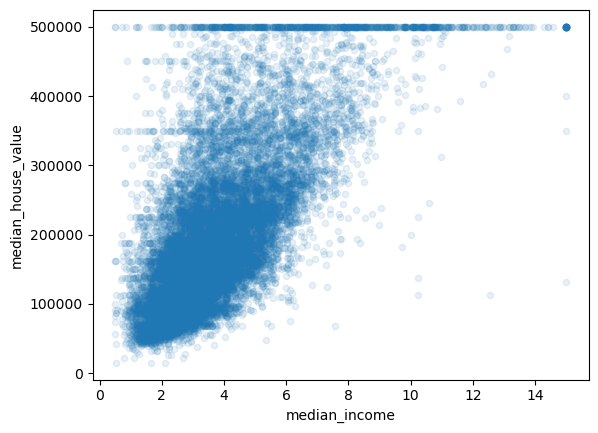

In [18]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)

In [19]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"]

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [20]:
# Custom Transformer for Adding Combined Attributes
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self  # Nothing to do here
    
    def transform(self, X):
        rooms_per_household = X[:, 3] / X[:, 6]
        population_per_household = X[:, 5] / X[:, 6]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 4] / X[:, 3]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [21]:
# List of numerical and categorical attributes
num_attribs = ["longitude", "latitude", "housing_median_age", 
               "total_rooms", "total_bedrooms", "population", 
               "households", "median_income"]

cat_attribs = ["ocean_proximity"]

In [22]:
# Numerical Pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),       # Fill missing values with median
    ('attribs_adder', CombinedAttributesAdder()),        # Add combined attributes
    ('scaler', StandardScaler()),                       # Standardize features
])

In [23]:
# Full Pipeline: Combine Numerical and Categorical Pipelines
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),                 # Apply num_pipeline to numerical columns
    ("cat", OneHotEncoder(), cat_attribs),              # One-hot encode categorical features
])

In [24]:
# Transform the Data
housing_prepared = full_pipeline.fit_transform(housing)

In [25]:
# linear regression model
# causes underfitting
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [26]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('predictions',lin_reg.predict(some_data_prepared))
print("labels",list(some_labels))

predictions [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
labels [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [27]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [28]:
# DecisionTreeRegressor
# causes overfitting
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [29]:
# cross val for tree model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_score = np.sqrt(-scores)
def display_scores(scores):
    print("Scores: ",scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_score)

Scores:  [71272.23071851 70948.96320558 66553.92926665 72623.22130258
 70486.23724947 75712.67867796 72351.37278057 74766.71199441
 69501.23469948 70620.5867109 ]
Mean: 71483.71666061072
Standard deviation: 2470.165188819135


In [30]:
# cross val for linear model
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_score = np.sqrt(-lin_scores)
display_scores(lin_rmse_score)
# so the tree is worse than linear regression

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180657


In [31]:
# random forest regressor 
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [32]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18635.748483050815

In [35]:
# random forest cross validation
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error", cv=3)
forest_rmse_score = np.sqrt(-forest_scores)
display_scores(forest_rmse_score)

Scores:  [49893.74072919 51578.10714719 52142.78523186]
Mean: 51204.87770274946
Standard deviation: 955.3447745518332


In [36]:
import joblib
# Save the Linear Regression model
joblib.dump(lin_reg, 'Home_Prices_linear_model.pkl')

# Save the Decision Tree model
joblib.dump(tree_reg, 'Home_Prices_tree_model.pkl')

# Save the Random Forest model
joblib.dump(forest_reg, 'Home_Prices_random_model.pkl')

['Home_Prices_random_model.pkl']

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [38]:
print("Best parameters:", grid_search.best_params_)
print("Best model:", grid_search.best_estimator_)

Best parameters: {'max_features': 8, 'n_estimators': 30}
Best model: RandomForestRegressor(max_features=8, n_estimators=30)


In [39]:
final_model = grid_search.best_estimator_

In [40]:
x_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
x_test_prepared = full_pipeline.transform(x_test)

In [42]:
final_predictions = final_model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48391.555093583396

In [44]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
confidence_interval = np.sqrt(
    stats.t.interval(
        confidence,
        len(squared_errors) - 1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors)
    )
)
confidence_interval
# Example: [45,685.1, 49,691.3]

array([46363.23610183, 50338.21159831])

In [45]:
joblib.dump(final_model, 'Home_Prices_final_model.pkl')

['Home_Prices_final_model.pkl']